# Load basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [3]:
df=pd.read_csv(r'C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\adult.csv')
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_new=df.copy()
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

# removing extra whitespace in all values

In [7]:
list_of_values=[]
for i in df_new.columns:
    if df_new[i].dtypes==object:
        list_of_values=[]
        for j in df_new[i]:
            list_of_values.append(j.strip())
        df_new[i]=list_of_values       

In [8]:
del df

In [9]:
df=df_new.copy()

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.shape

(32561, 15)

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

<AxesSubplot:title={'center':'Null Values Plot'}>

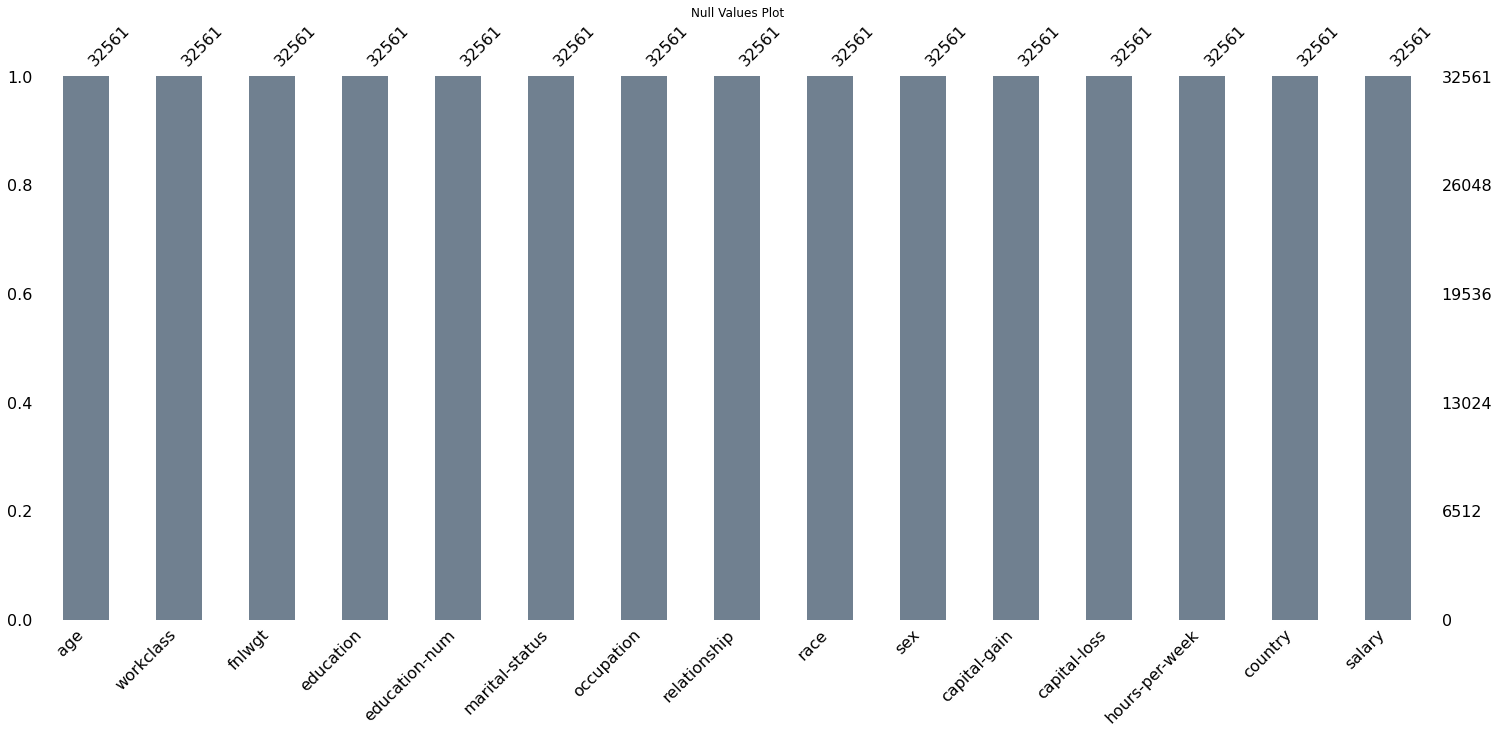

In [13]:
plt.title("Null Values Plot")
ms.bar(df, color = 'slategrey')

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [15]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [16]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [17]:
df[df['workclass']=='?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

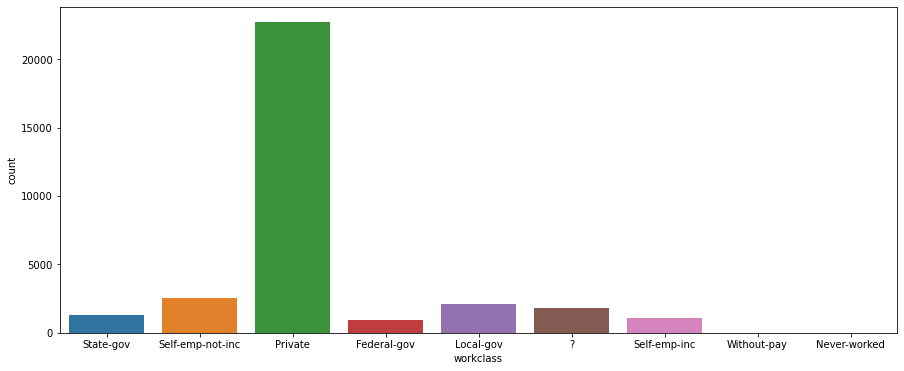

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='workclass')
df['workclass'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

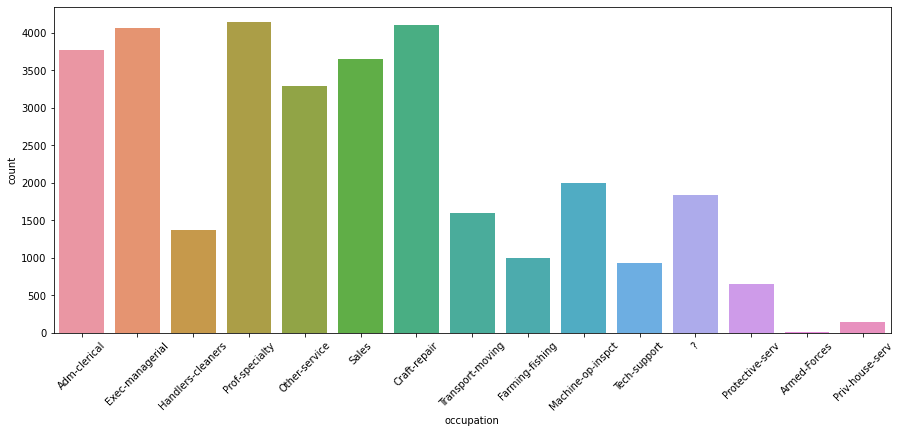

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='occupation')
plt.xticks(rotation=45)
df['occupation'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

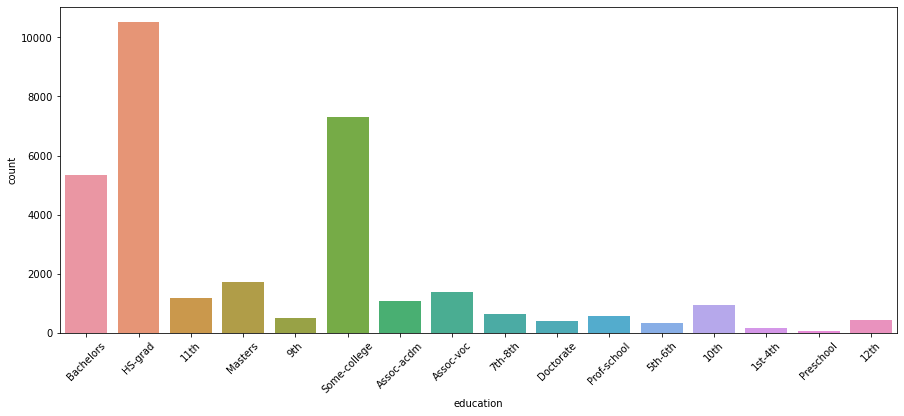

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='education')
plt.xticks(rotation=45)
df['education'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

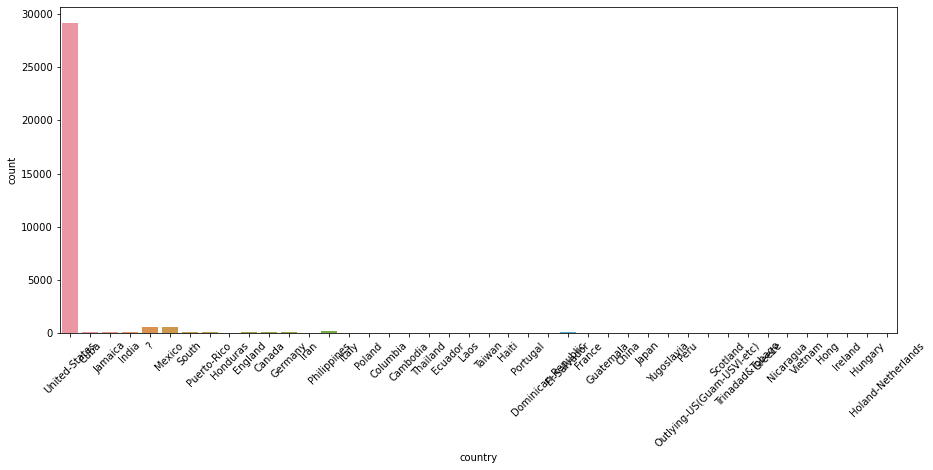

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='country')
plt.xticks(rotation=45)
df['country'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

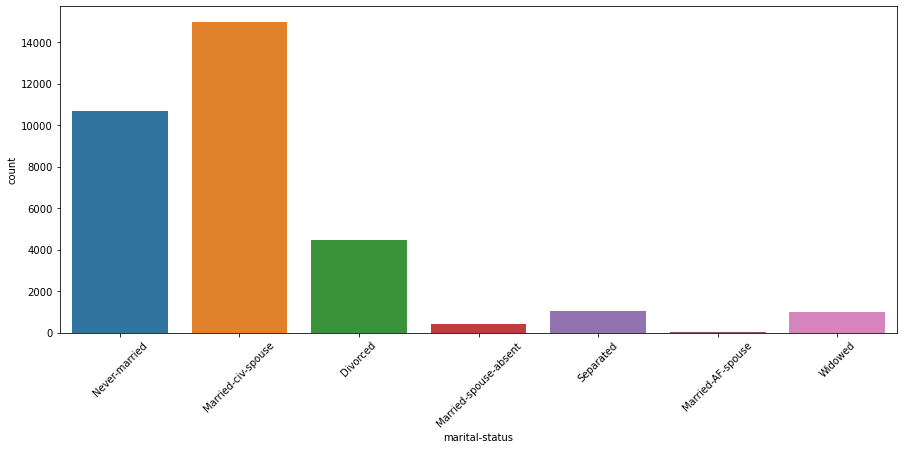

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='marital-status')
plt.xticks(rotation=45)
df['marital-status'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

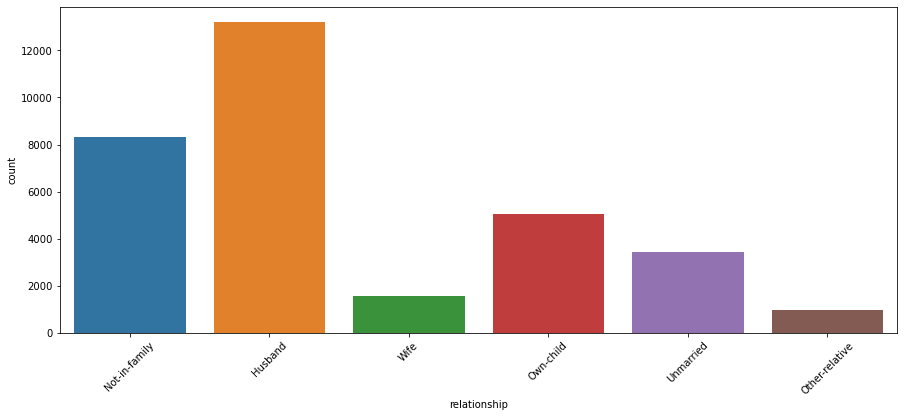

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='relationship')
plt.xticks(rotation=45)
df['relationship'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

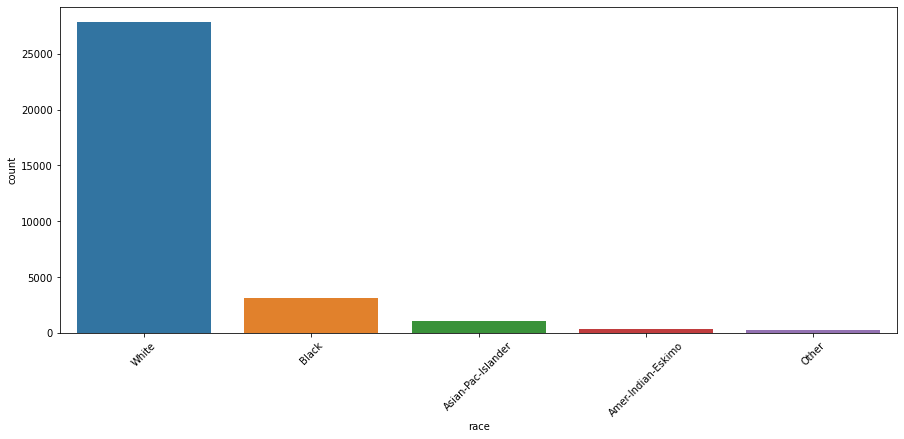

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='race')
plt.xticks(rotation=45)
df['race'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

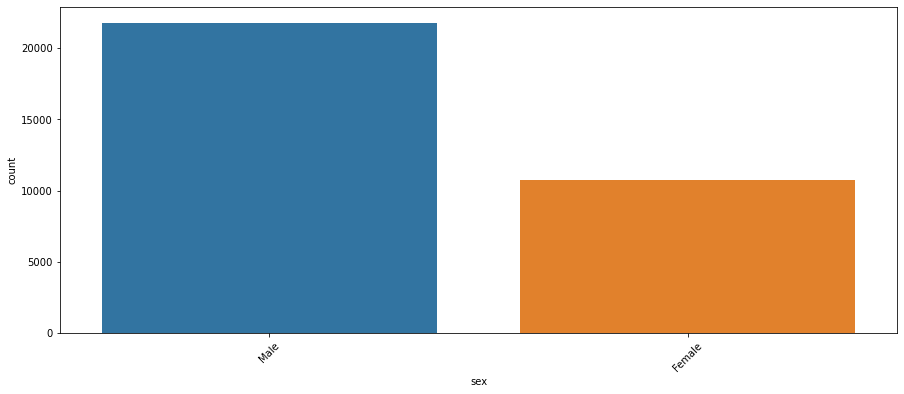

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='sex')
plt.xticks(rotation=45)
df['sex'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

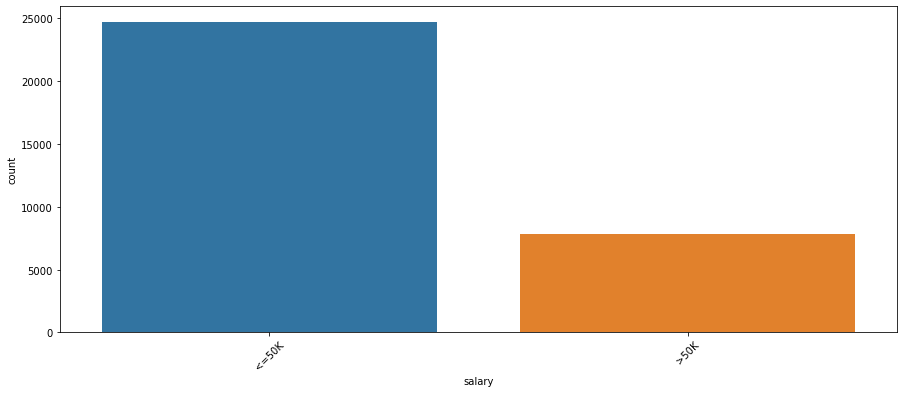

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='salary')
plt.xticks(rotation=45)
df['salary'].value_counts()

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

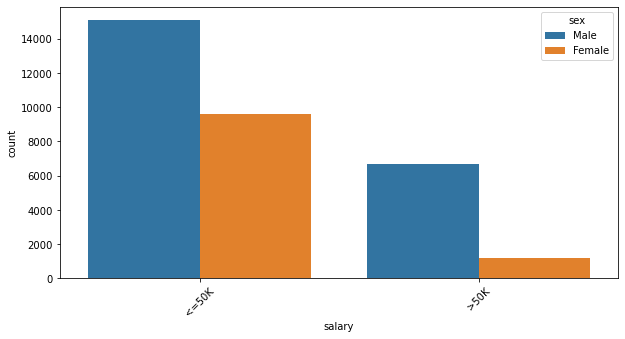

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='sex')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

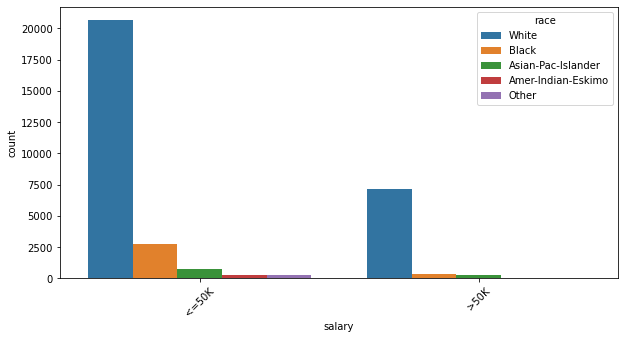

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='race')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

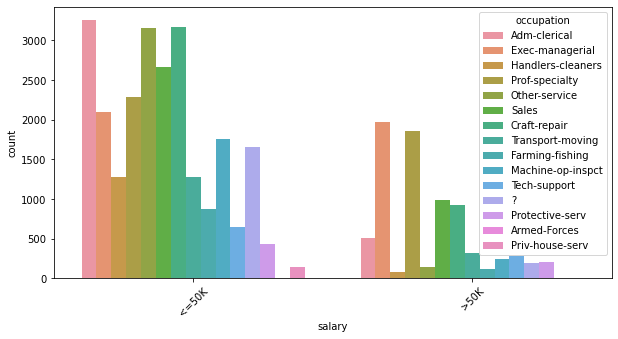

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='occupation')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

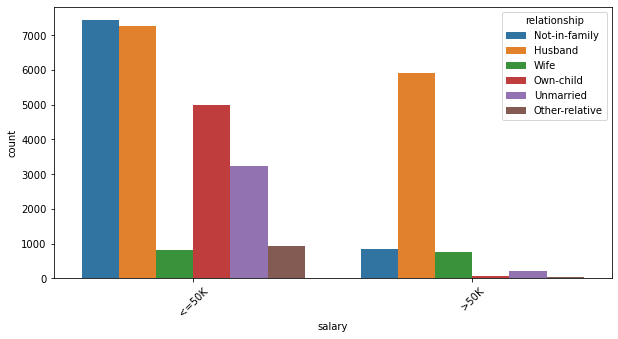

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='relationship')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

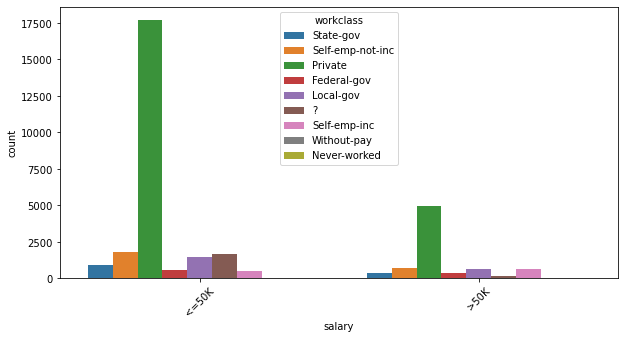

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='workclass')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

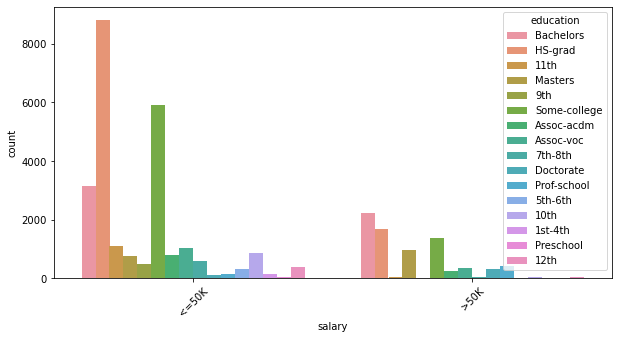

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='education')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

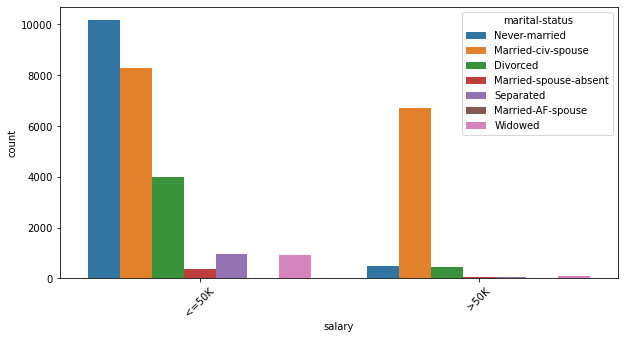

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='salary',hue='marital-status')
plt.xticks(rotation=45)

# filling ? values

In [36]:
df.replace('?', np.nan, inplace=True)

In [37]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [38]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [39]:
del df_new

In [41]:
df_new=df.copy()

In [42]:
df_new

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
df_new['workclass']=df_new['workclass'].replace(np.nan,df['workclass'].mode()[0])
df_new['country']=df_new['country'].replace(np.nan,df['country'].mode()[0])
df_new['occupation']=df_new['occupation'].replace(np.nan,df['occupation'].mode()[0])

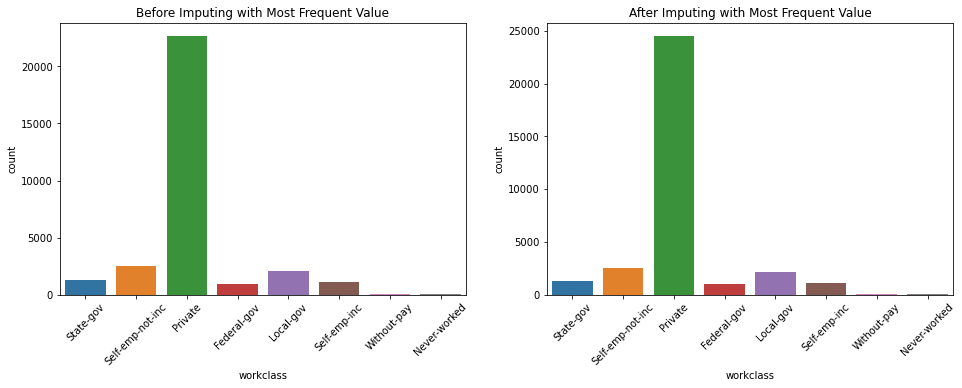

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'workclass')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['workclass'].replace(np.nan,df['workclass'].mode()[0]),x=df_new['workclass'],)
plt.xticks(rotation=45)
plt.show()

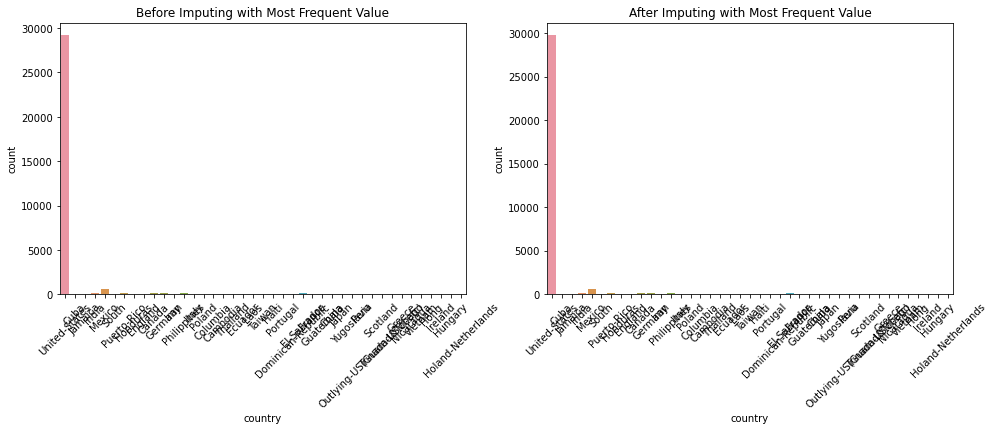

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'country')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['country'].replace(np.nan,df['country'].mode()[0]),x=df_new['country'])
plt.xticks(rotation=45)
plt.show()

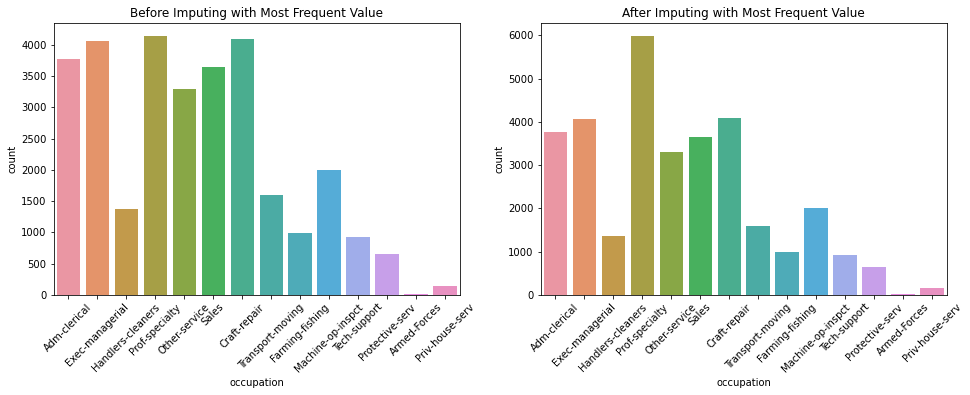

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'occupation')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['occupation'].replace(np.nan,df['occupation'].mode()[0]),x=df_new['occupation'])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

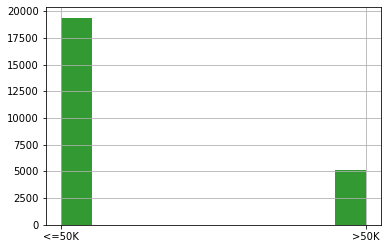

In [47]:
fig=plt.figure()
#ax1=fig.add_subplot(111)
#df[df['workclass'].isnull()]['salary'].hist(ax=ax1,color='red')
#plt.legend('with nan')
ax2=fig.add_subplot(111)
df_new[df_new['workclass']=="Private"]['salary'].hist(ax=ax2,color='green',alpha=0.8)
#plt.legend('without nan')

In [48]:
#creating function to check distribution after imputing ? value with suitable method
def cat_distribution(df,df_new,variable):
    tmp=pd.concat(
                [df[variable].value_counts()/len(df),
                 df_new[variable].value_counts()/len(df_new)],axis=1)
    tmp.columns=['with_nan','without_nan']
    return tmp

In [49]:
cat_distribution(df,df_new,'workclass')

,with_nan,without_nan
Private,0.697030,0.753417
Self-emp-not-inc,0.078038,0.078038
Local-gov,0.064279,0.064279
State-gov,0.039864,0.039864
Self-emp-inc,0.034274,0.034274
Federal-gov,0.029483,0.029483
Without-pay,0.000430,0.000430
Never-worked,0.000215,0.000215


In [50]:
cat_distribution(df,df_new,'occupation')

,with_nan,without_nan
Prof-specialty,0.127146,0.183747
Craft-repair,0.125887,0.125887
Exec-managerial,0.124873,0.124873
Adm-clerical,0.115783,0.115783
Sales,0.112097,0.112097
Other-service,0.101195,0.101195
Machine-op-inspct,0.061485,0.061485
Transport-moving,0.049046,0.049046
Handlers-cleaners,0.042075,0.042075
Farming-fishing,0.030527,0.030527


In [51]:
cat_distribution(df,df_new,'country')

,with_nan,without_nan
United-States,0.895857,0.913762
Mexico,0.019748,0.019748
Philippines,0.006081,0.006081
Germany,0.004207,0.004207
Canada,0.003716,0.003716
Puerto-Rico,0.003501,0.003501
El-Salvador,0.003255,0.003255
India,0.003071,0.003071
Cuba,0.002918,0.002918
England,0.002764,0.002764


# FEATURE ENGINEERING

In [52]:
df_new['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

There are lot of values in education column.so we can replace

In [53]:
df_new['education']=df_new['education'].replace(['Preschool','1st-4th','5th-6th','9th','7th-8th','10th','12th','11th'],'school')
df_new['education']=df_new['education'].replace(['HS-grad'],'high school')
df_new['education']=df_new['education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df_new['education']=df_new['education'].replace(['Bachelors'],'undergrad')
df_new['education']=df_new['education'].replace(['Masters'],'grad')
df_new['education']=df_new['education'].replace(['Doctorate'],'doc')

In [54]:
df_new['marital-status']=df_new['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df_new['marital-status']=df_new['marital-status'].replace(['Never-married'],'not_married')
df_new['marital-status']=df_new['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [55]:
df_new['salary']=df_new['salary'].replace(['<=50K'],0)
df_new['salary']=df_new['salary'].replace(['>=50K','>50K'],1)

In [56]:
df_new['education'].value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

In [57]:
df_new['marital-status'].value_counts()

married        14999
not_married    10683
other           6879
Name: marital-status, dtype: int64

In [58]:
df_new['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [59]:
df_new.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4237,29,Private,237865,grad,14,not_married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,0
32373,22,Private,205940,undergrad,13,not_married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
31104,47,Local-gov,200471,high school,9,married,Transport-moving,Husband,White,Male,5178,0,40,United-States,1
15670,31,Private,145139,undergrad,13,married,Craft-repair,Husband,White,Male,0,0,40,United-States,1
15201,62,Private,238913,higher,10,married,Tech-support,Husband,White,Male,2829,0,24,United-States,0
20121,40,Federal-gov,26880,higher,10,not_married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30833,25,Private,110978,higher,12,married,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,37,India,1
8803,23,Local-gov,203353,undergrad,13,not_married,Exec-managerial,Own-child,White,Female,0,0,12,United-States,0
4464,73,Private,132737,school,6,not_married,Prof-specialty,Not-in-family,White,Male,0,0,4,United-States,0
22241,27,Private,209801,higher,10,not_married,Adm-clerical,Not-in-family,White,Female,0,0,45,United-States,0


In [71]:
px.pie(df_new,values='education-num',names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

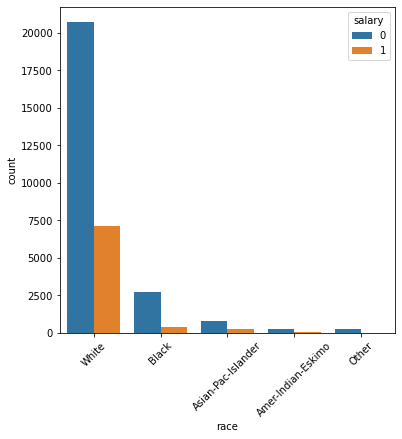

In [72]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_new,x='race',hue='salary')
plt.xticks(rotation=45);

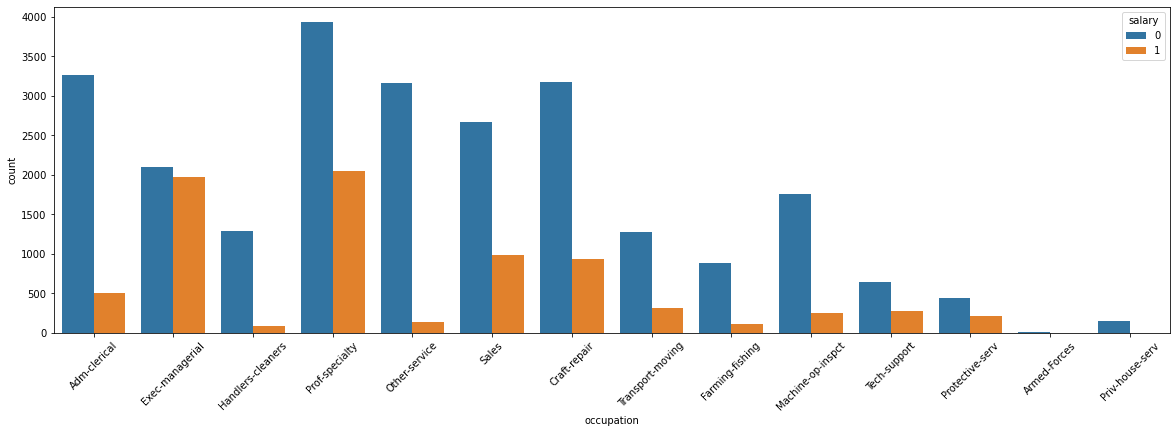

In [73]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_new,x='occupation',hue='salary')
plt.xticks(rotation=45);

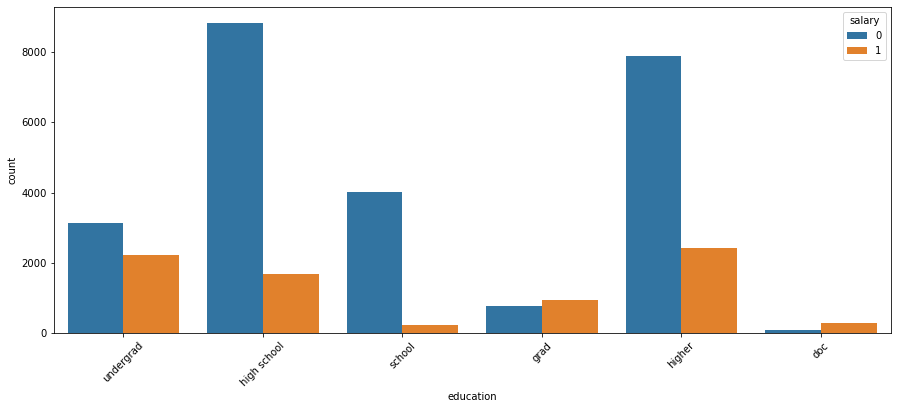

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_new,x='education',hue='salary')
plt.xticks(rotation=45);

<AxesSubplot:>

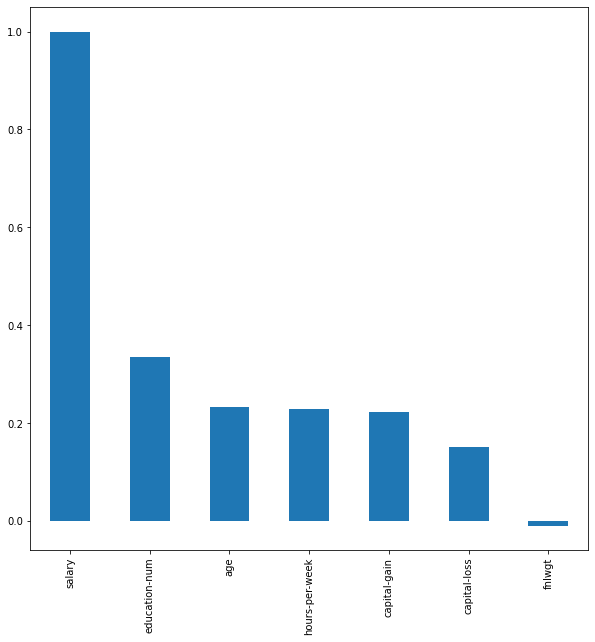

In [75]:
plt.figure(figsize=(10,10))
df_new.corr()['salary'].sort_values(ascending=False).plot(kind='bar')

In [60]:
df_new.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

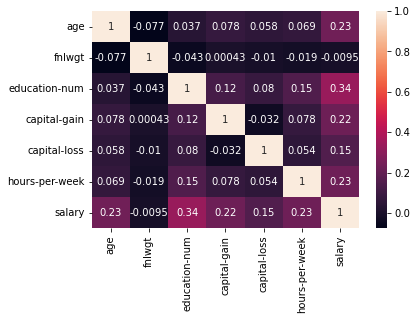

In [61]:
sns.heatmap(df_new.corr(),annot=True)

# Key Findings

The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40.

The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

outliers observed in almost all the numeric features, these are the extreme values that are present in the data.

Not very strong correlation observed among variables.